# **Project - Topic Modelling On BBC News**

In this project, the task is to identify major themes/topics across a collection of BBC news articles.

The Data provided is divided into Five categories, that are, Sports, Tech, Business, Entertainment and Politics. Across these folders the data is stored in form of text files such that each text file contains the complete transcript of the article.

The dataset in this case isn't collective, it has been stored in form of numerous text files sub-categorized in Five different domains. First I segregated the data by traversing all these folders and storing the data present in the files to a data-frame.

We found out that most of the documents have the length between 0-5000.

Here I've used the LSA(Latent Semantic Analysis) and LDA (Latent Dirichlet Allocation) algorithm for modelling the topics on the BBC news articles and the later gave us very convincing results.

# **Problem Description**

BBC stands for British Broadcasting Corporation.

It is an operational business division of the British Broadcasting Corporation (BBC) responsible for the gathering and broadcasting of news and current affairs in the UK and around the world. The department is the world's largest broadcast news organisation and generates about 120 hours of radio and television output each day, as well as online news coverage.

The service maintains 50 foreign news bureaus with more than 250 correspondents around the world.

BBC News Online is the BBC's news website. It is one of the most popular news websites in the UK, reaching over a quarter of the UK's internet users, and worldwide, with around 14 million global readers every month.

The website contains international news coverage as well as articles based on entertainment, sport, science, and political news.

In this project the task is to identify major themes/topics across a collection of BBC news articles.

# *Projects Workflow*

* *Importing Libraries*
* *Loading the Dataset*
* *EDA on features*
* *Vectorization*
* *Data fitting to LSA and LDA models*
* *Comparison of Models*
* *Final selection of the model*


### **Importing The Libraries**

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud

from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation,TruncatedSVD

import nltk
from nltk.stem import SnowballStemmer,PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from textblob import TextBlob, Word

import string
import re
from collections import Counter


import warnings
warnings.filterwarnings('ignore')

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHADO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SHADO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# **Importing The Dataset**

In [87]:
df=pd.read_csv("BBC News Train.csv\BBC News Train.csv")

In [88]:
df.sample(4)

,ArticleId,Text,Category
1158,2095,cyber crime booms in 2004 the last 12 months h...,tech
302,435,s korean lender faces liquidation creditors of...,business
1012,1475,lufthansa may sue over bush visit german airli...,business
267,1621,no jail for singer courtney love singer courtn...,entertainment


This Dataset Consist Of 3 Columns..

`ArticleId`:Which Containbs Id About Article.


`Text`:Which Contains Text For Our Model.

`Category`:Which Contains Categorical Value.

In [89]:
df["Text"][0]

'worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices used by worldcom. mr ebb

In [90]:
df.shape

(1490, 3)

In [91]:
df["Category"].value_counts()

Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64

Let's Check For Duplicate And Null Values

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


In [93]:
df.isna().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

In [94]:
df.duplicated().sum()

0

In [95]:
def text_len(text):
    return len(text)

In [96]:
text="Hi  ima aditya"

In [97]:
df["text_length"]=df["Text"].apply(text_len)

In [98]:
df.sample(10)

,ArticleId,Text,Category,text_length
1316,2142,blogs take on the mainstream web logs or blogs...,tech,4317
1249,1948,aviation firms eye booming india india s defen...,business,2515
726,1114,satellite mapping aids darfur relief aid worke...,tech,3097
1179,728,anti-spam laws bite spammer hard the net s sel...,tech,2145
1108,790,parker misses england clash tom shanklin will ...,sport,2422
796,1183,three djs replace peel radio show the late joh...,entertainment,2304
342,762,oscars steer clear of controversy the oscars n...,entertainment,3799
1299,2221,cars pull down us retail figures us retail sal...,business,1745
1400,1814,yukos unit buyer faces loan claim the owners o...,business,1549
246,1446,kennedy criticises unfair taxes gordon brown...,politics,2229


# **Data Wrangling And Visulaisation**

In [99]:
sns.set_palette("Set3")
sns.set_style("dark")

Lenth of Each Text

Text(0.5, 1.0, 'News length distribution')

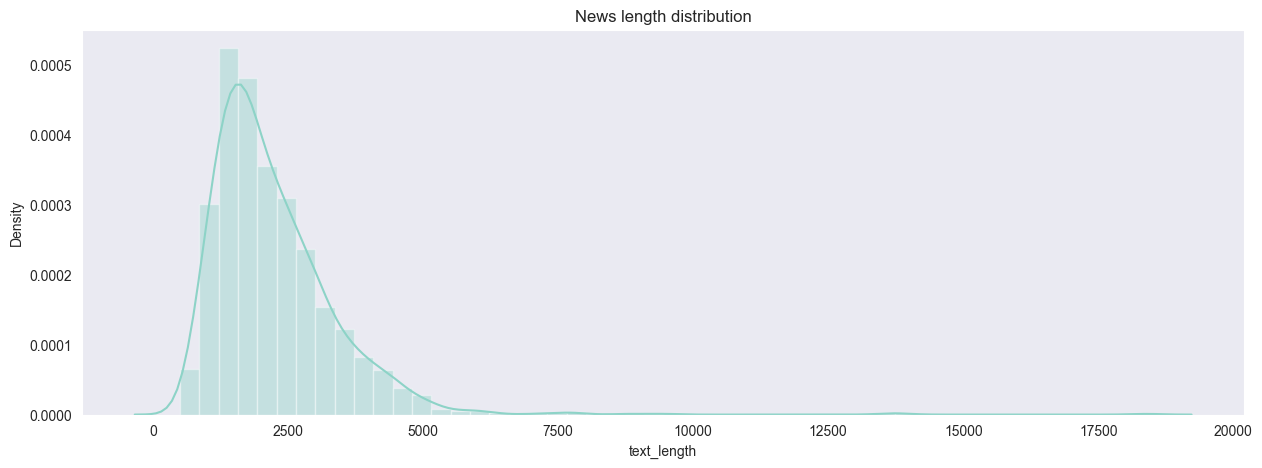

In [100]:
plt.figure(figsize=(15, 5))
sns.distplot(df['text_length']).set_title('News length distribution')

In [101]:
df.columns

Index(['ArticleId', 'Text', 'Category', 'text_length'], dtype='object')

Lengh Of Text Based On Category

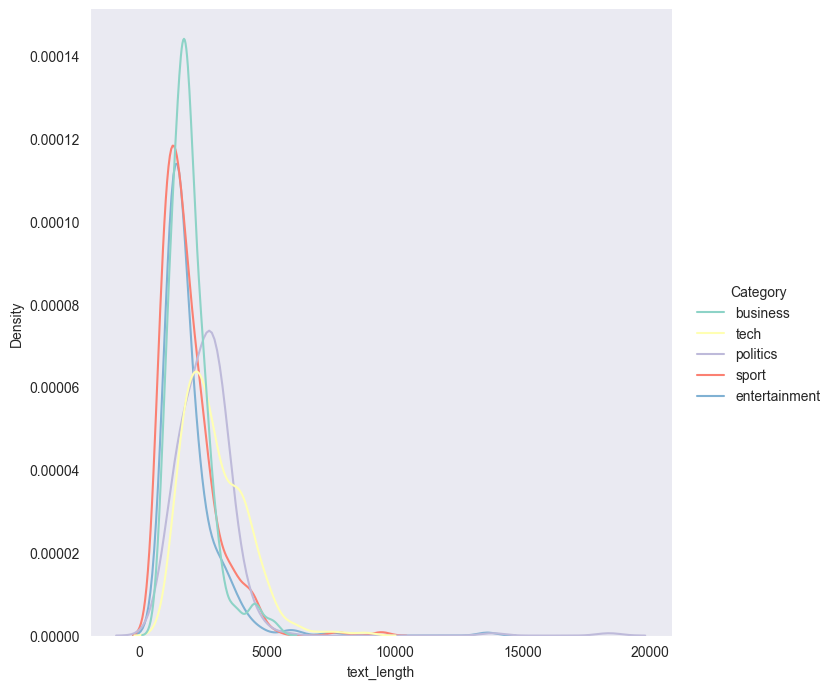

In [102]:
sns.displot(df, x="text_length", hue="Category", kind="kde",height=7,aspect =1 )

plt.show()

In [103]:
cat_count=df.groupby("Category")["Category"].count()

In [104]:
cat_count

Category
business         336
entertainment    273
politics         274
sport            346
tech             261
Name: Category, dtype: int64

Categorical Distribution

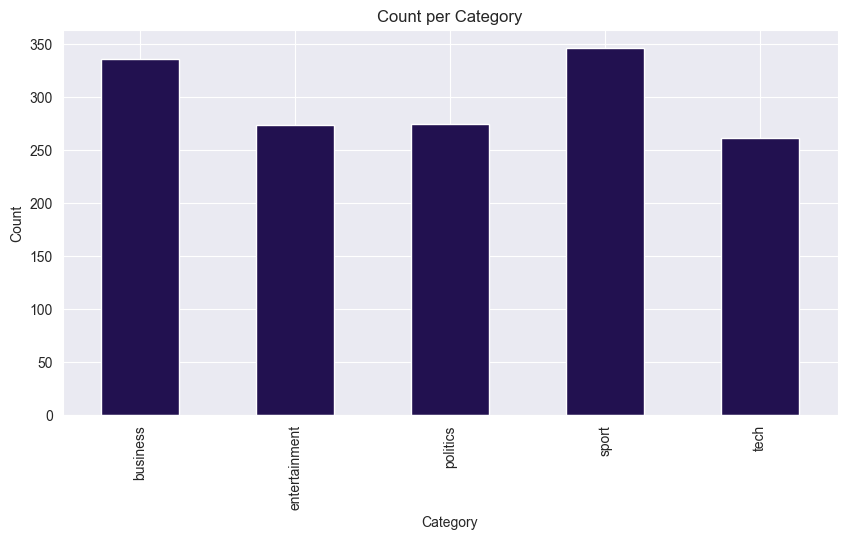

In [105]:
plt.figure(figsize=(10,5))
sns.set_palette("magma")
cat_count.plot(kind ='bar', grid =True)
plt.ylabel("Count")
plt.title("Count per Category")
plt.show()

Dropping ArtcledId Column

In [106]:
df=df.drop(columns=["ArticleId"])

In [107]:
df

,Text,Category,text_length
0,worldcom ex-boss launches defence lawyers defe...,business,1866
1,german business confidence slides german busin...,business,2016
2,bbc poll indicates economic gloom citizens in ...,business,3104
3,lifestyle governs mobile choice faster bett...,tech,3618
4,enron bosses in $168m payout eighteen former e...,business,2190
...,...,...,...
1485,double eviction from big brother model caprice...,entertainment,1266
1486,dj double act revamp chart show dj duo jk and ...,entertainment,3111
1487,weak dollar hits reuters revenues at media gro...,business,1370
1488,apple ipod family expands market apple has exp...,tech,3242


In [108]:
content=df.reset_index()

In [109]:
content

,index,Text,Category,text_length
0,0,worldcom ex-boss launches defence lawyers defe...,business,1866
1,1,german business confidence slides german busin...,business,2016
2,2,bbc poll indicates economic gloom citizens in ...,business,3104
3,3,lifestyle governs mobile choice faster bett...,tech,3618
4,4,enron bosses in $168m payout eighteen former e...,business,2190
...,...,...,...,...
1485,1485,double eviction from big brother model caprice...,entertainment,1266
1486,1486,dj double act revamp chart show dj duo jk and ...,entertainment,3111
1487,1487,weak dollar hits reuters revenues at media gro...,business,1370
1488,1488,apple ipod family expands market apple has exp...,tech,3242


In [110]:
content = content['Text']

In [111]:
content

0       worldcom ex-boss launches defence lawyers defe...
1       german business confidence slides german busin...
2       bbc poll indicates economic gloom citizens in ...
3       lifestyle  governs mobile choice  faster  bett...
4       enron bosses in $168m payout eighteen former e...
                              ...                        
1485    double eviction from big brother model caprice...
1486    dj double act revamp chart show dj duo jk and ...
1487    weak dollar hits reuters revenues at media gro...
1488    apple ipod family expands market apple has exp...
1489    santy worm makes unwelcome visit thousands of ...
Name: Text, Length: 1490, dtype: object

In [112]:
text="hdjs... !!!!"

Creating A Function To Remove Punctuations

In [113]:
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    
    text_without_punctuation = text.translate(translator)
    
    return text_without_punctuation



In [114]:
print(remove_punctuation(text))

hdjs 


In [115]:
df["Text"]=df["Text"].apply(remove_punctuation)

In [116]:
df.head(2)

,Text,Category,text_length
0,worldcom exboss launches defence lawyers defen...,business,1866
1,german business confidence slides german busin...,business,2016


Creating a Function for stopwords removal and Lemmatizing

In [117]:
def remove_stopwords_and_lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    word_tokenize_arr=word_tokenize(text)
    filteredWord=[lemmatizer.lemmatize(word) for word in  word_tokenize_arr if word.lower() not in stopwords.words("english")]
    return " ".join(filteredWord)
    

In [118]:
df["Text"]=df["Text"].apply(lambda x:remove_stopwords_and_lemmatize(x))

In [119]:
df.sample(7)

,Text,Category,text_length
311,ask jeeves tip online ad revival ask jeeves be...,business,1141
1160,sir paul rock super bowl crowd sir paul mccart...,entertainment,2397
101,ukip could sue veritas defector uk independenc...,politics,1785
1319,google launch tv search service net search gia...,tech,2031
336,mcconnell detail scot wave toll least three pe...,politics,1783
1341,lacroix label bought u firm luxury good group ...,business,888
888,toxic web link help virus spread virus writer ...,tech,3179


In [123]:
content=df["Text"].values    

In [155]:
content

array(['worldcom exboss launch defence lawyer defending former worldcom chief bernie ebbers battery fraud charge called company whistleblower first witness cynthia cooper worldcom exhead internal accounting alerted director irregular accounting practice u telecom giant 2002 warning led collapse firm following discovery 11bn £57bn accounting fraud mr ebbers pleaded guilty charge fraud conspiracy prosecution lawyer argued mr ebbers orchestrated series accounting trick worldcom ordering employee hide expense inflate revenue meet wall street earnings estimate m cooper run consulting business told jury new york wednesday external auditor arthur andersen approved worldcom accounting early 2001 2002 said andersen given green light procedure practice used worldcom mr ebber lawyer said unaware fraud arguing auditor alert problem m cooper also said shareholder meeting mr ebbers often passed technical question company finance chief giving brief answer prosecution star witness former worldcom fina

Finding Most Common Words in My Dataset

In [172]:
def find_most_common_words(lines):

    text = ' '.join(lines)

    words = text.split()

    word_counts = Counter(words)

    most_common_words = word_counts.most_common()

    return most_common_words



In [173]:
result = find_most_common_words(content)    


In [174]:
result

[('said', 4838),
 ('mr', 2006),
 ('year', 1853),
 ('would', 1711),
 ('also', 1426),
 ('new', 1334),
 ('people', 1323),
 ('u', 1227),
 ('one', 1190),
 ('could', 1032),
 ('game', 947),
 ('time', 939),
 ('first', 893),
 ('last', 883),
 ('say', 844),
 ('two', 816),
 ('world', 811),
 ('film', 802),
 ('government', 771),
 ('uk', 757),
 ('make', 695),
 ('company', 682),
 ('firm', 675),
 ('get', 626),
 ('number', 619),
 ('service', 617),
 ('best', 606),
 ('told', 591),
 ('made', 575),
 ('country', 564),
 ('many', 561),
 ('take', 557),
 ('month', 554),
 ('like', 550),
 ('000', 545),
 ('market', 540),
 ('three', 535),
 ('week', 529),
 ('way', 526),
 ('player', 526),
 ('back', 521),
 ('music', 512),
 ('labour', 509),
 ('show', 509),
 ('next', 509),
 ('set', 508),
 ('election', 502),
 ('party', 498),
 ('sale', 497),
 ('win', 494),
 ('well', 483),
 ('bbc', 482),
 ('minister', 479),
 ('good', 478),
 ('plan', 478),
 ('may', 477),
 ('home', 477),
 ('want', 476),
 ('added', 465),
 ('work', 460),
 ('mob

In [176]:
top_25_words=result[0:24]

In [177]:
for word,count in top_25_words:
    print("Word is: {}".format(word))
    print("Count is: {}".format(count))
    print("-----------------------------------------------")

Word is: said
Count is: 4838
-----------------------------------------------
Word is: mr
Count is: 2006
-----------------------------------------------
Word is: year
Count is: 1853
-----------------------------------------------
Word is: would
Count is: 1711
-----------------------------------------------
Word is: also
Count is: 1426
-----------------------------------------------
Word is: new
Count is: 1334
-----------------------------------------------
Word is: people
Count is: 1323
-----------------------------------------------
Word is: u
Count is: 1227
-----------------------------------------------
Word is: one
Count is: 1190
-----------------------------------------------
Word is: could
Count is: 1032
-----------------------------------------------
Word is: game
Count is: 947
-----------------------------------------------
Word is: time
Count is: 939
-----------------------------------------------
Word is: first
Count is: 893
-----------------------------------------------
Word

In [179]:
top_25_words

[('said', 4838),
 ('mr', 2006),
 ('year', 1853),
 ('would', 1711),
 ('also', 1426),
 ('new', 1334),
 ('people', 1323),
 ('u', 1227),
 ('one', 1190),
 ('could', 1032),
 ('game', 947),
 ('time', 939),
 ('first', 893),
 ('last', 883),
 ('say', 844),
 ('two', 816),
 ('world', 811),
 ('film', 802),
 ('government', 771),
 ('uk', 757),
 ('make', 695),
 ('company', 682),
 ('firm', 675),
 ('get', 626)]

In [180]:
top_25_dict=dict(top_25_words)

In [181]:
top_25_dict

{'said': 4838,
 'mr': 2006,
 'year': 1853,
 'would': 1711,
 'also': 1426,
 'new': 1334,
 'people': 1323,
 'u': 1227,
 'one': 1190,
 'could': 1032,
 'game': 947,
 'time': 939,
 'first': 893,
 'last': 883,
 'say': 844,
 'two': 816,
 'world': 811,
 'film': 802,
 'government': 771,
 'uk': 757,
 'make': 695,
 'company': 682,
 'firm': 675,
 'get': 626}

Plotting Those Words in my dataset

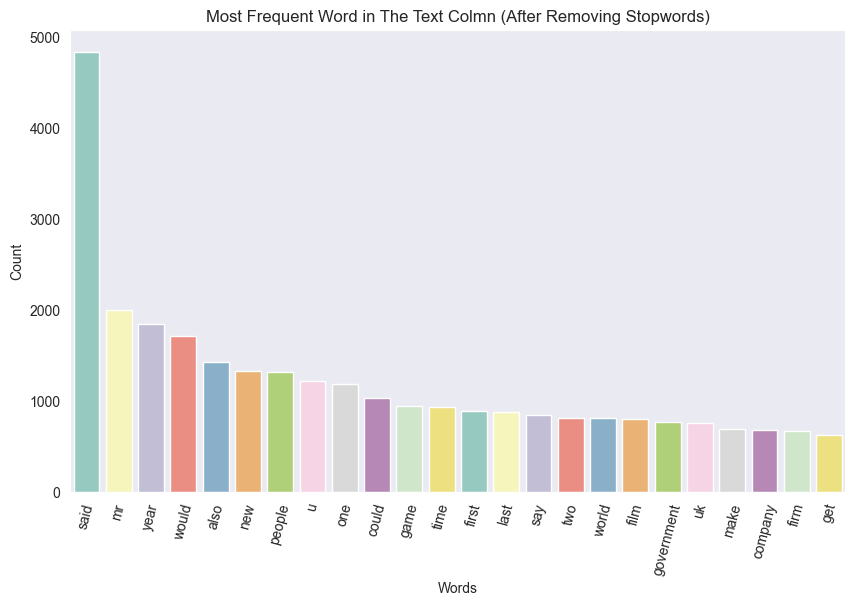

In [194]:
keys_list = list(top_25_dict.keys())
values_list = list(top_25_dict.values())
plt.figure(figsize=(10,6))
sns.barplot(x=keys_list, y=values_list,palette="Set3")
plt.xticks(rotation=75)
plt.title("Most Frequent Word in The Text Colmn (After Removing Stopwords)")
plt.xlabel("Words")
plt.ylabel("Count")
plt.show()


### Createing A Function To Plot WordCloud For Different Categories

In [195]:
def create_wordcloud(words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

# **Business**

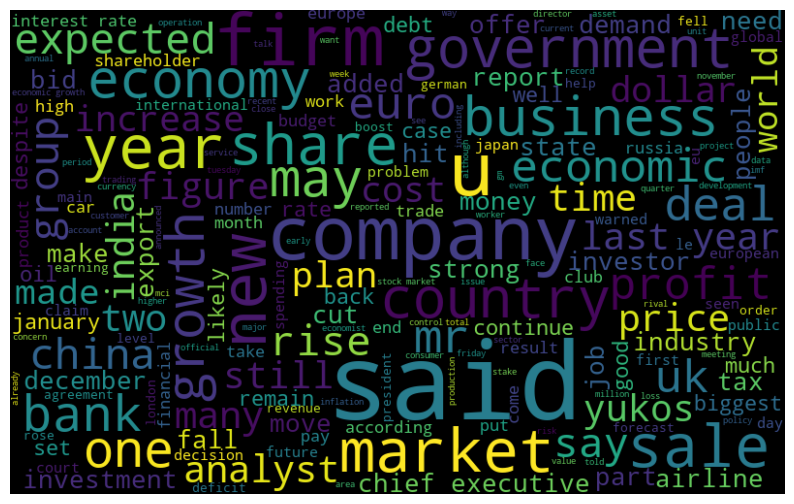

In [200]:
subset=df[df.Category=="business"]
text=subset.Text.values
words =" ".join(text)
create_wordcloud(words)


# **Tech**

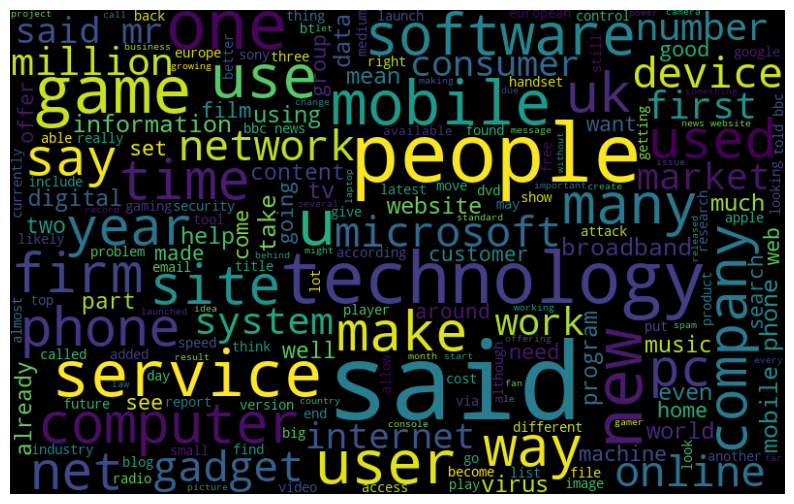

In [205]:
subset1=df[df["Category"]=="tech"]
text1=subset1.Text.values
words1=" ".join(text1)
create_wordcloud(words1)

# **Sport**

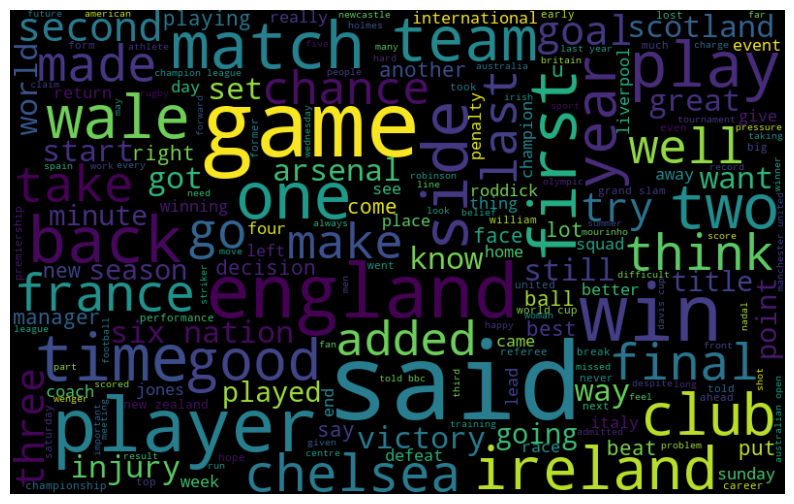

In [206]:
subset1=df[df["Category"]=="sport"]
text1=subset1.Text.values
words1=" ".join(text1)
create_wordcloud(words1)

# **Politics**

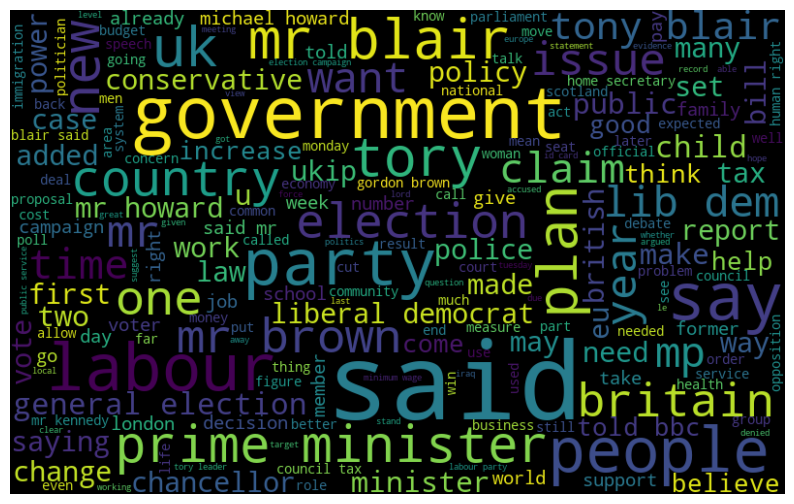

In [207]:
subset1=df[df["Category"]=="politics"]
text1=subset1.Text.values
words1=" ".join(text1)
create_wordcloud(words1)

# **Entertainment**

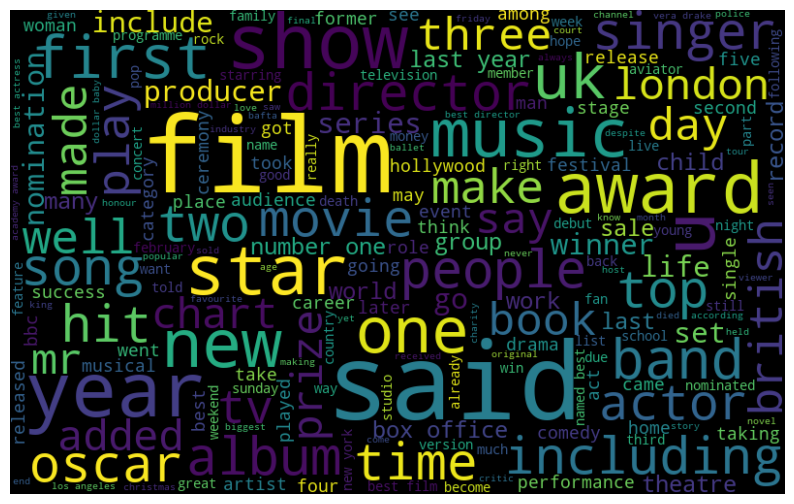

In [332]:
subset1=df[df["Category"]=="entertainment"]
text1=subset1.Text.values
words1=" ".join(text1)
create_wordcloud(words1)

Vectorizing My Text Column

In [333]:
count_vectorizer = CountVectorizer(max_features = 4000)

In [334]:
text_sample = content
text_sample

array(['worldcom exboss launch defence lawyer defending former worldcom chief bernie ebbers battery fraud charge called company whistleblower first witness cynthia cooper worldcom exhead internal accounting alerted director irregular accounting practice u telecom giant 2002 warning led collapse firm following discovery 11bn £57bn accounting fraud mr ebbers pleaded guilty charge fraud conspiracy prosecution lawyer argued mr ebbers orchestrated series accounting trick worldcom ordering employee hide expense inflate revenue meet wall street earnings estimate m cooper run consulting business told jury new york wednesday external auditor arthur andersen approved worldcom accounting early 2001 2002 said andersen given green light procedure practice used worldcom mr ebber lawyer said unaware fraud arguing auditor alert problem m cooper also said shareholder meeting mr ebbers often passed technical question company finance chief giving brief answer prosecution star witness former worldcom fina

In [335]:
document_term_matrix = count_vectorizer.fit_transform(text_sample)


### **Passing Through SVD Model**

In [336]:
svd_model = TruncatedSVD(n_components=5, algorithm='randomized', n_iter=100, random_state=23)

svd_model.fit(document_term_matrix)

TruncatedSVD(n_components=5, n_iter=100, random_state=23)

In [337]:
count_vectorizer.get_feature_names_out()

array(['000', '000m', '01', ..., 'zealand', 'zero', 'zone'], dtype=object)

In [338]:
terms = count_vectorizer.get_feature_names_out()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:40]
    print(" ")
    print("Topic "+str(i+1)+": ")
    print(" ")
    for t in sorted_terms:
        print(t[0])

 
Topic 1: 
 
said
mr
would
people
year
new
also
one
could
government
say
time
game
first
uk
make
get
world
party
service
last
two
many
labour
mobile
company
country
like
firm
music
told
film
phone
election
way
number
tax
blair
minister
good
 
Topic 2: 
 
game
mobile
phone
film
first
year
music
best
player
one
technology
time
gadget
world
new
tv
digital
roddick
award
win
like
also
play
number
video
nadal
people
top
show
two
device
million
sale
service
three
camera
england
point
pc
consumer
 
Topic 3: 
 
film
best
game
win
award
mr
first
roddick
two
england
actor
wale
party
new
nadal
time
labour
director
actress
side
election
point
zealand
world
ireland
brown
back
star
blair
team
play
match
second
british
oscar
winner
cup
one
aviator
last
 
Topic 4: 
 
wage
minimum
increase
business
pay
tax
job
people
government
year
work
rate
employer
rise
worker
hour
good
get
cost
paid
economy
small
level
many
income
low
really
inflation
one
company
country
staff
employee
roddick
working
per
right
put

### **Now Using LDA Model**

In [339]:
grid_params = {'n_components' : [5]}

lda = LatentDirichletAllocation(random_state = 23)

lda_model = GridSearchCV(lda, param_grid = grid_params)
lda_model.fit(document_term_matrix)

best_lda_model = lda_model.best_estimator_
print("Best log likelihood Score for the LDA model",lda_model.best_score_)
print("LDA model Perplexity on train data", best_lda_model.perplexity(document_term_matrix))

Best log likelihood Score for the LDA model -423502.0543087814
LDA model Perplexity on train data 1584.9457025113554


In [347]:
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()


### Plotting LDA Pannel

In [348]:
lda_panel = pyLDAvis.lda_model.prepare(best_lda_model, document_term_matrix, count_vectorizer, mds='tsne')


In [349]:
lda_panel

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
1      18.556179  16.440578       1        1  30.390393
3      25.360678  -7.371730       2        1  22.365719
4      16.138819 -30.500780       3        1  20.731276
0      -5.402513   7.087589       4        1  13.523982
2      -6.035805 -17.644369       5        1  12.988630, topic_info=            Term        Freq        Total Category  logprob  loglift
1460        film  782.000000   782.000000  Default  30.0000  30.0000
1583        game  918.000000   918.000000  Default  29.0000  29.0000
487         best  589.000000   589.000000  Default  28.0000  28.0000
1652  government  779.000000   779.000000  Default  27.0000  27.0000
409        award  374.000000   374.000000  Default  26.0000  26.0000
...          ...         ...          ...      ...      ...      ...
3984        year  122.951262  1826.982194   Topic5  -5.6457  -0.6575
3959       world  109.791993   794.967525   Topic5  -5.7589   0.0614
1616         get  101.861843   615.374432   Topic5  -5.8339   0.2425
812      company   96.245133   682.974261   Topic5  -5.8906   0.0815
2230        make   95.704695   685.584356   Topic5  -5.8962   0.0721

[399 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.506967      000
0         2  0.303078      000
0         3  0.027553      000
0         4  0.077147      000
0         5  0.084494      000
...     ...       ...      ...
3984      3  0.223319     year
3984      4  0.171868     year
3984      5  0.067324     year
3996      1  0.989571    yukos
3997      3  0.991428  zealand

[806 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 5, 1, 3])

In [350]:
docterms = lda_panel.token_table.sort_values(by = ['Freq'], ascending=False)
     
# display docterms df
docterms 

,Topic,Freq,Term
term,,,
581,2,0.998040,broadband
172,4,0.997989,actor
3753,4,0.997082,ukip
3579,1,0.996876,tax
3799,2,0.996793,user
...,...,...,...
2434,4,0.003049,net
3796,4,0.002486,use
1583,4,0.002178,game


In [363]:
topicsdf = pd.DataFrame()
# adding top 50 most relevant terms for each topic to the dataframe
for i in range(1,6):
  Topicdict ={ "Topic":i, "Terms":list(docterms[docterms['Topic']==i]['Term'].head(50))  }
  topicsdf=pd.concat([pd.DataFrame(Topicdict),topicsdf])
topicsdf

,Topic,Terms
0,5,blog
1,5,nintendo
2,5,jeeves
3,5,highdefinition
4,5,xbox
...,...,...
45,1,china
46,1,investment
47,1,election
48,1,economy


## **Topic 1: Politics**

In [364]:
t1dict = {}
for vals in docterms[docterms['Topic']==1].head(40).values:
  t1dict[vals[2]] =vals[1]
t1dict

{'tax': 0.9968763927663155,
 'chancellor': 0.9952898717398244,
 'prime': 0.9938647038793643,
 'parmalat': 0.9903157767208165,
 'rosneft': 0.9902829077274546,
 'treasury': 0.9902270426436017,
 'rupee': 0.9901992999780289,
 'khodorkovsky': 0.9901972342029872,
 'prescott': 0.9901261512961512,
 'airport': 0.9901156155326669,
 'gazprom': 0.990028830201666,
 'milburn': 0.9899787265522215,
 'creditor': 0.9899412694717278,
 'poverty': 0.989853596821782,
 'glazer': 0.989802760358929,
 'stake': 0.9897706978214326,
 'debt': 0.9896915011002876,
 'pension': 0.9896835812148941,
 'reform': 0.9896767892666483,
 'shareholder': 0.9896567621377296,
 'investor': 0.9896343851197508,
 'yukos': 0.9895712520768785,
 'blair': 0.9851951749055132,
 'oil': 0.984711528336847,
 'wage': 0.9787981734074922,
 'minimum': 0.9742103530796948,
 'budget': 0.9728004944099011,
 'finance': 0.9717662257571366,
 'income': 0.9701134425802722,
 'indonesia': 0.9619430663921426,
 'fiscal': 0.9603203119472071,
 'earnings': 0.9600359

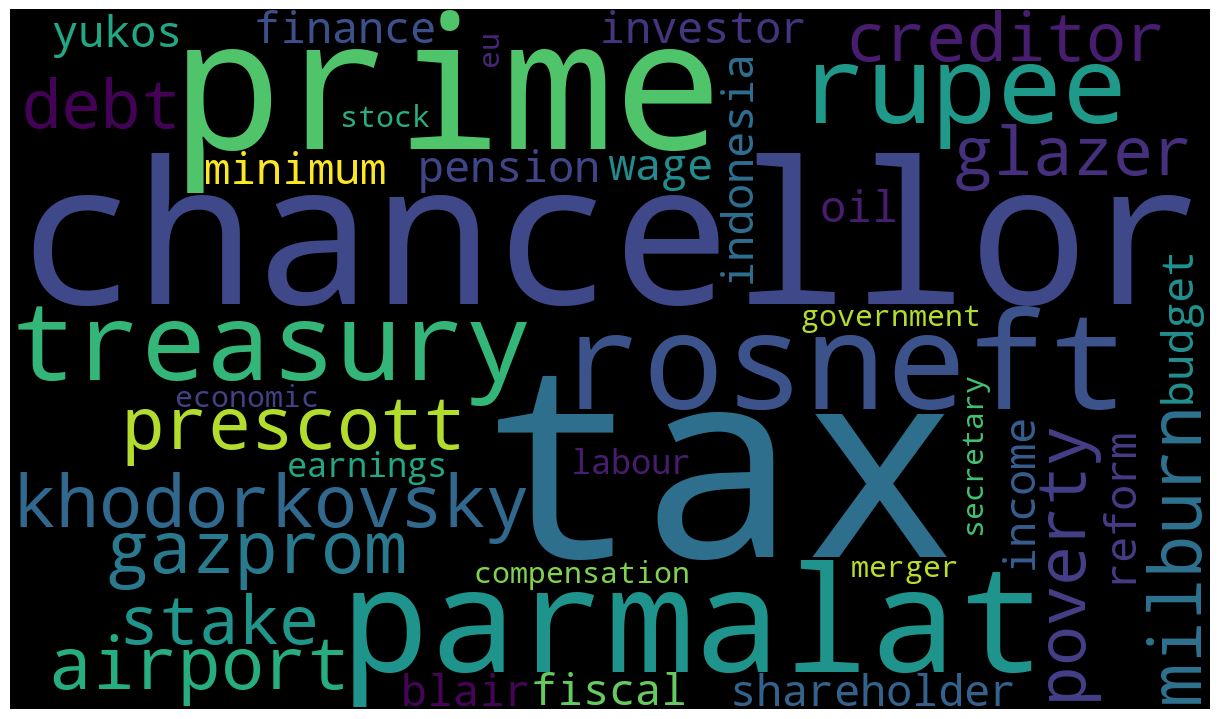

In [365]:
wordcloud = WordCloud(width = 1200, height = 700,
                min_font_size = 10).generate(' '.join(list(t1dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t1dict)

     

# plotting the WordCloud image                      
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## **Topic 2: Tech**

In [366]:
t2dict = {}
for vals in docterms[docterms['Topic']==2].head(40).values:
  t2dict[vals[2]] =vals[1]
t2dict

{'broadband': 0.9980404241425147,
 'user': 0.9967933605325032,
 'album': 0.9960734861317144,
 'mac': 0.995633892994784,
 'mobile': 0.994566750242288,
 'ipod': 0.9937881958790484,
 'gadget': 0.9927801284596532,
 'laptop': 0.992056858964552,
 'spyware': 0.9917316881625267,
 'storage': 0.9903038724854462,
 'browser': 0.990303564947639,
 'concert': 0.98863771313961,
 'antivirus': 0.9871781320773122,
 'download': 0.9870923417646135,
 'multimedia': 0.9866487657247842,
 'wifi': 0.9866487334997213,
 'domain': 0.9860936441566417,
 'mini': 0.9854693473592092,
 'pop': 0.9851421129593162,
 'spam': 0.9851081090515025,
 'bt': 0.9847975448980983,
 'elvis': 0.9842631931860983,
 'desktop': 0.9842587915699287,
 'handset': 0.9838178703552664,
 'mtv': 0.9835908643803986,
 'infected': 0.9835827898652532,
 'operator': 0.983473090826236,
 'portable': 0.9831271694849755,
 'vodafone': 0.9821180259110952,
 'wireless': 0.9785753988551026,
 'phone': 0.9763366306139795,
 'digital': 0.9707819756203165,
 'apple': 0.

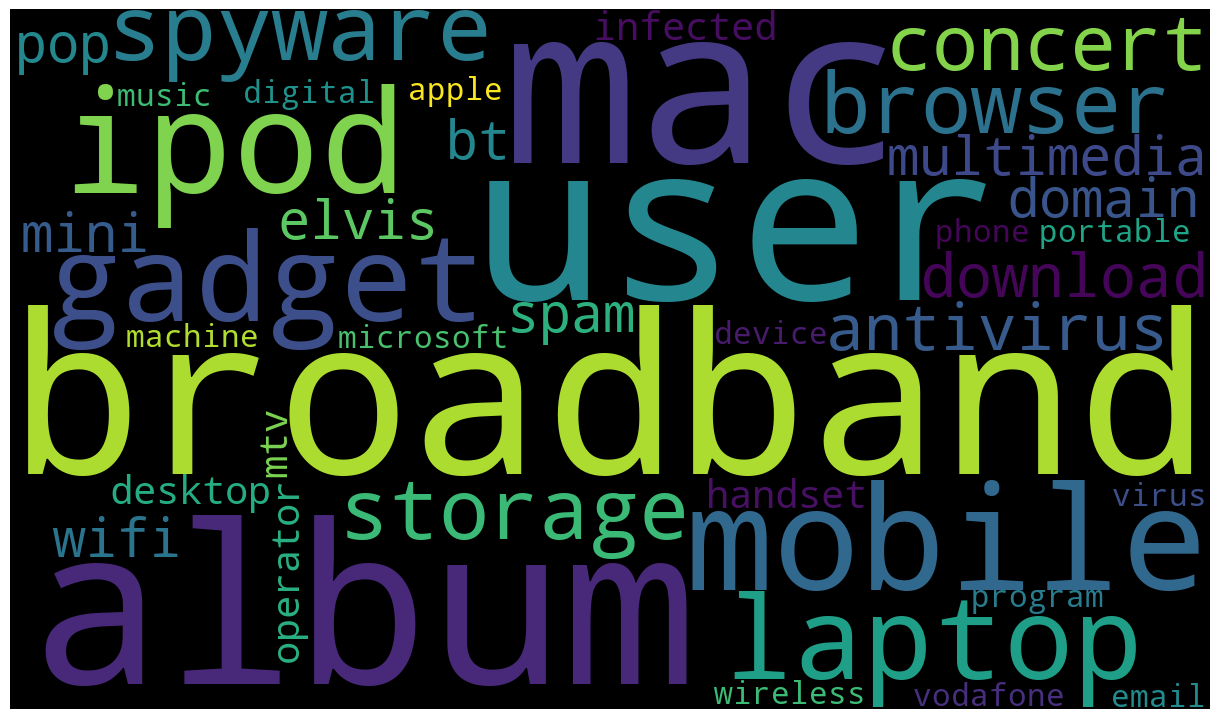

In [367]:
# generating the wordcloud for topic 1
wordcloud = WordCloud(width = 1200, height = 700,
                min_font_size = 10).generate(' '.join(list(t2dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t2dict)

     

# plotting the WordCloud image                      
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## **Topic 3 : Sports**

In [368]:

# creating term freq dict for topic 3
t3dict = {}
for vals in docterms[docterms['Topic']==3].head(40).values:
  t3dict[vals[2]] =vals[1]
t3dict
     

{'championship': 0.9956174532788431,
 'cup': 0.9954902400134774,
 'rugby': 0.9947236955364629,
 'holmes': 0.9945199353170506,
 'tournament': 0.9937118135561327,
 'chelsea': 0.9925886678004279,
 'nadal': 0.9920149173163029,
 'tennis': 0.9920123426595575,
 'gerrard': 0.9918027420718698,
 'benitez': 0.9918026829111575,
 'arsenal': 0.9917538666747591,
 'zealand': 0.9914277467998742,
 'mourinho': 0.9911222473215857,
 'roddick': 0.9911137783282686,
 'federer': 0.9904477788665234,
 'marathon': 0.9890206845368499,
 'referee': 0.98782621149635,
 'gm': 0.987216069192885,
 'everton': 0.9859314450709731,
 'wimbledon': 0.9859274544648572,
 'slam': 0.9846162854142483,
 'seed': 0.9828457312510366,
 'ferguson': 0.9818308074690839,
 'gara': 0.9801998283703116,
 'striker': 0.9801140173125183,
 'stadium': 0.9788347996483953,
 'squad': 0.9750801286992639,
 'henman': 0.974472110244569,
 'champion': 0.9731344456148967,
 'ball': 0.9713666299509186,
 'dallaglio': 0.9694609003630004,
 'radcliffe': 0.9694601437

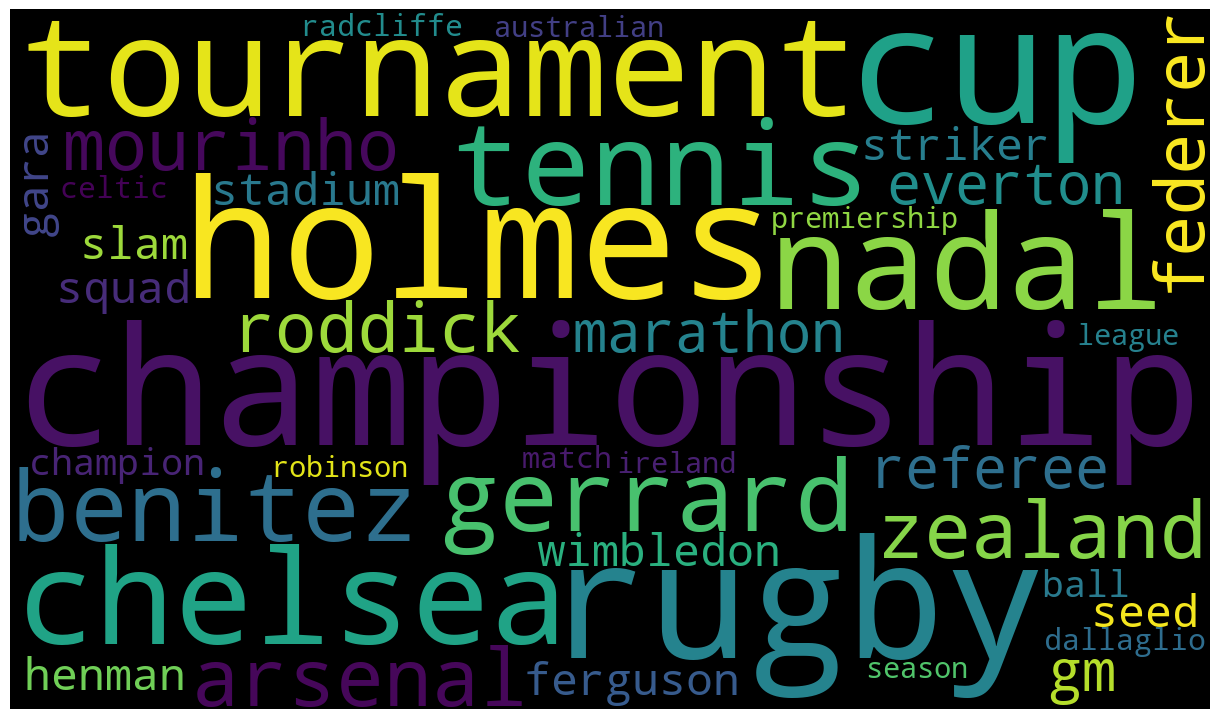

In [369]:

# generating the wordcloud for topic 1
wordcloud = WordCloud(width = 1200, height = 700,
                min_font_size = 10).generate(' '.join(list(t3dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t3dict)

     

# plotting the WordCloud image                      
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()
     

# **Topic 4:Sports**

In [370]:
# creating term freq dict for topic 4
t4dict = {}
for vals in docterms[docterms['Topic']==4].head(40).values:
  t4dict[vals[2]] =vals[1]
t4dict

{'actor': 0.9979890912754172,
 'ukip': 0.9970820400514815,
 'nomination': 0.9955207776756584,
 'starring': 0.9946318523742493,
 'actress': 0.993350172045546,
 'oscar': 0.9914018831387635,
 'theatre': 0.9901459044157972,
 'award': 0.9898855364327703,
 'hollywood': 0.98922550680223,
 'imelda': 0.9890146663070366,
 'festival': 0.9881643308982156,
 'aviator': 0.9872452096597464,
 'kilroysilk': 0.9861744441013307,
 'foxx': 0.9852756804969761,
 'comedy': 0.983383782832628,
 'academy': 0.983231563458493,
 'ebbers': 0.9825105442513308,
 'nominated': 0.9798355200314429,
 'sideways': 0.9770610044425967,
 'fiat': 0.9770465836747856,
 'drake': 0.9758031366778228,
 'conte': 0.9757973837531747,
 'nominee': 0.971621831987961,
 'staunton': 0.9700733110110326,
 'swank': 0.9684362448018732,
 'eastwood': 0.9667029045045555,
 'bafta': 0.9667025306372754,
 'musical': 0.9657913061403471,
 'scorsese': 0.9648645365623305,
 'referendum': 0.9648436060829921,
 'presenter': 0.9586107396360374,
 'singer': 0.956504

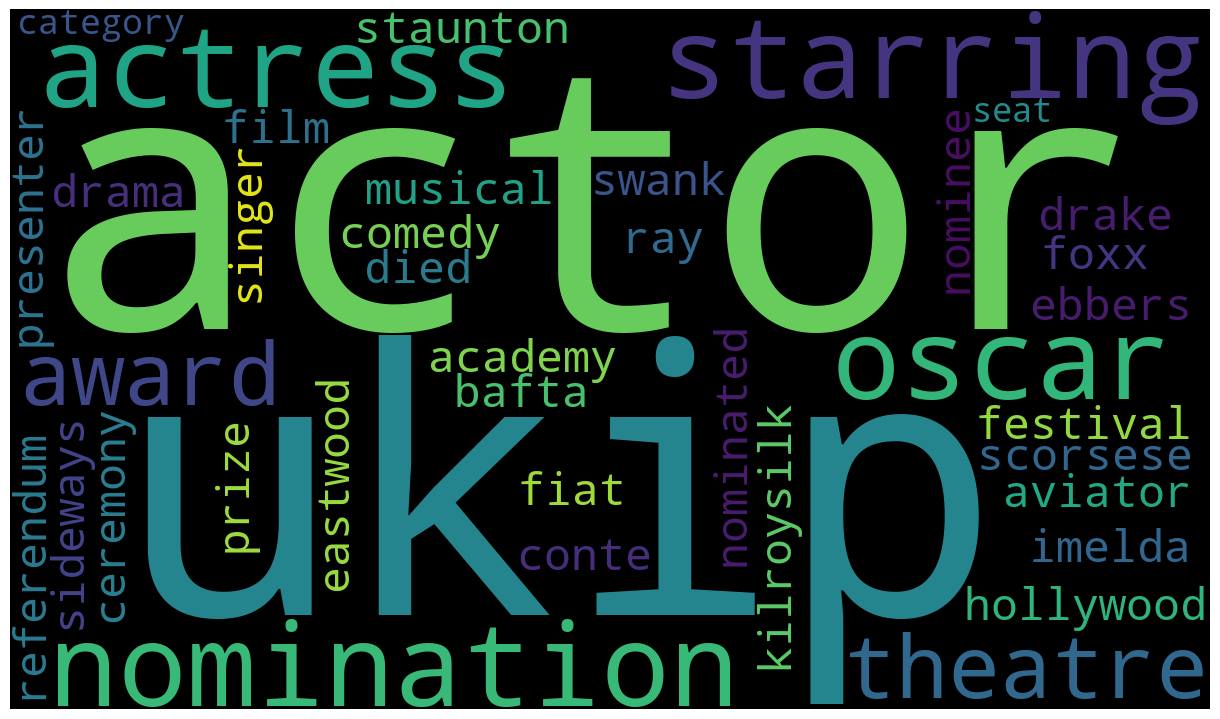

In [374]:

# generating the wordcloud for topic 4
wordcloud = WordCloud(width = 1200, height = 700,
                min_font_size = 10).generate(' '.join(list(t4dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t4dict)

     

# plotting the WordCloud image                      
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## **Topic 5: Business**

In [372]:
# creating term freq dict for topic 5
t5dict = {}
for vals in docterms[docterms['Topic']==5].head(40).values:
  t5dict[vals[2]] =vals[1]
t5dict
     

{'blog': 0.9955040370889962,
 'nintendo': 0.9887712284795319,
 'jeeves': 0.9886990777089398,
 'highdefinition': 0.9856659495145886,
 'xbox': 0.9849758231325206,
 'cairn': 0.9834274950562059,
 'hunt': 0.9827448353423538,
 'gamers': 0.9827430772849521,
 'souness': 0.9818690360569372,
 'uwb': 0.9818504024203984,
 'iptv': 0.9818468900784212,
 'giggs': 0.9802146735062301,
 'verizon': 0.9782779229709668,
 'p2p': 0.9773839295448183,
 'kenteris': 0.9763500887820292,
 'invention': 0.9762526958317047,
 'guantanamo': 0.9762521532112524,
 'hd': 0.9762505265295354,
 'detention': 0.9762403492192706,
 'patent': 0.9752650857005805,
 'blogger': 0.9741305542237247,
 'millan': 0.9740300478358225,
 'qwest': 0.971579195387764,
 'drinking': 0.9715567360537765,
 'hp': 0.9688737399688744,
 'goldsmith': 0.9659949216570354,
 'antidoping': 0.9658806172497478,
 'hunting': 0.9647245702806178,
 'thanou': 0.9643704428350008,
 'animal': 0.9643678001861572,
 'suspect': 0.9629490798183198,
 'iaaf': 0.9307557469609491,


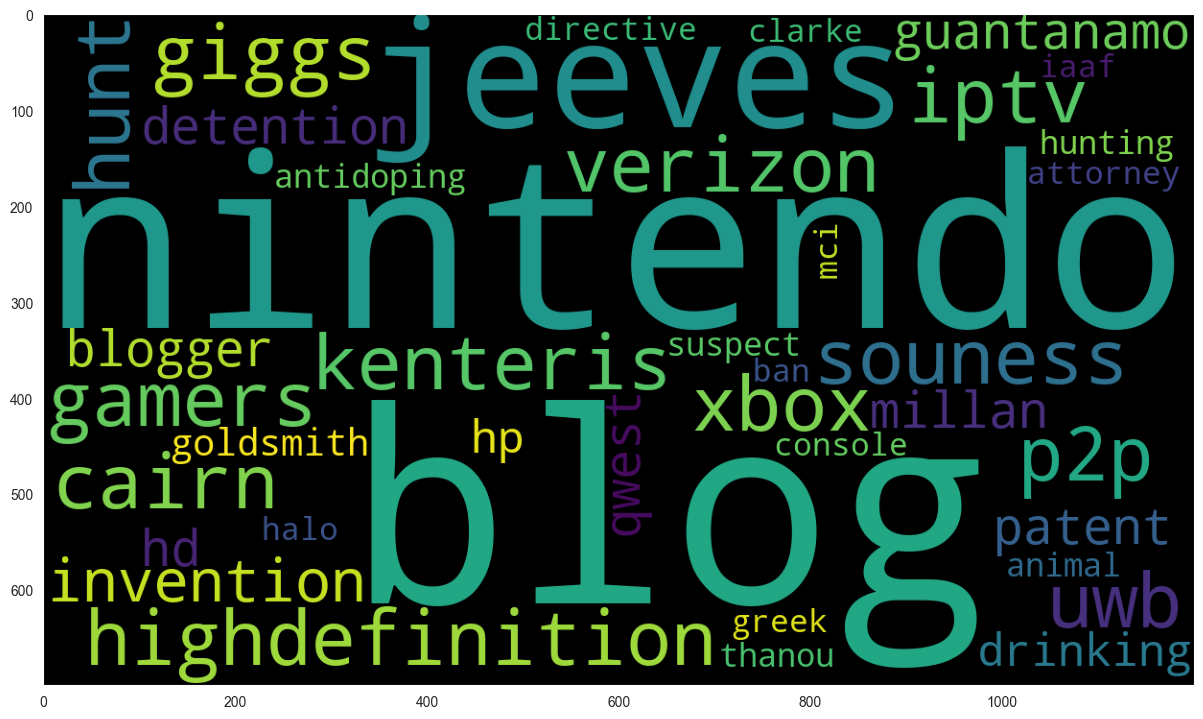

In [373]:

# generating the wordcloud for topic 1
wordcloud = WordCloud(width = 1200, height = 700,
                min_font_size = 10).generate(' '.join(list(t5dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t5dict)

     

# plotting the WordCloud image                      
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.tight_layout(pad = 0)
 
plt.show()

## **Conclusion**

## **EDA Conclusion :**
* Most of the content length lies between 0-5000 but some cases the length extends upto 25,000.

* The most articles are in the business and sports categories, followed by politics, entertainment, and technology.

* The term "said" appears the most in all article.


## **Model Conclusion :**
* Even though the LSA model did segregate the contents into five topic but the result was very bad, there were mixed up words in each topic.

* So we won't be considering the LSA, and start of with LDA.

* Best log likelihood Score for the LDA model is -649716.062235419.

* LDA model Perplexity on train data is 1601.6094311751326.

*We successfully categorised the contents using the LDA method by analysing the common words related for each category.*